In [ ]:
using Pkg
Pkg.add("Distributions")
using Pkg
Pkg.add("Plots")
using Pkg
Pkg.add("StatsPlots")

In [1]:
using Distributions
using Plots
using StatsPlots

# Question 2
We perform the function to generate the p-vector in the following way

In [2]:
function hypercubesphere(n)
    flag = 0
    while flag == 0
        hypercube = Float64[]
        sum = 0
        for i in 1:n
            randval = rand(Uniform(-1,1))
            push!(hypercube, randval)
            sum = sum + randval^2
        end
        if (sum <= 1)
            flag = 1
            return hypercube
        end
    end
end

hypercubesphere (generic function with 1 method)

### For plotting the result for 2 dimensions

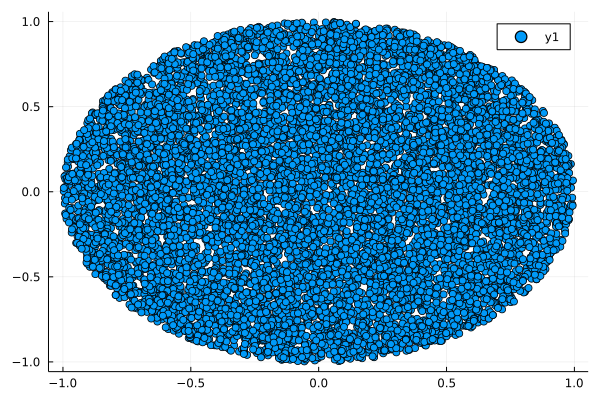

In [3]:
plotval1 = Array{Float64}(undef, 10000, 1)
plotval2 = Array{Float64}(undef, 10000, 1)

# hypercube = hypercubesphere(2)
# println(hypercube)


for i in 1:10000
    hypercube = hypercubesphere(2)
    plotval1[i] = hypercube[1]
    plotval2[i] = hypercube[2]
end

plot(plotval1, plotval2, seriestype = :scatter)

To see effect as p increases, we rewrite the function to give average number of attempts required for results to be obtained

In [4]:
function numberOfTries(n)
    flag = 0
    tries = 0
    while flag == 0
        tries = tries + 1
        hypercube = Float64[]
        sum = 0
        for i in 1:n
            randval = rand(Uniform(-1,1))
            push!(hypercube, randval)
            sum = sum + randval^2
        end
        if (sum <= 1)
            flag = 1
            return tries
        end
    end
end

numberOfTries (generic function with 1 method)

In [5]:
triesForDiffVals = Array{Float64}(undef, 5)

for i in 1:5
    for j in 1:10000
        triesForDiffVals[i] = triesForDiffVals[i] + numberOfTries(i+1)
    end
    triesForDiffVals[i] = triesForDiffVals[i]/10000
end

for i in 1:5
    println("Average number of tries required for ", i+1, " dimensional vector: ", triesForDiffVals[i])
end
    

Average number of tries required for 2 dimensional vector: 1.2803
Average number of tries required for 3 dimensional vector: 1.9044
Average number of tries required for 4 dimensional vector: 3.2437
Average number of tries required for 5 dimensional vector: 6.1347
Average number of tries required for 6 dimensional vector: 12.4139


**Therefore, we see that as the dimention increases, the number of iterations also increase**

# QUESTION 3



 Note: In the question, when we evaluate the c value, we get it as *1/(CDF(-a) - CDF(a))*.

 When we evaluate the ratio **f(Y)/c*g(Y)** we see, we get 1 when y lies between -a and a, and 0 otherwise. Therefore, 
 it is sufficient to check the condition, if the random sample from normal distribution lies between (-a, a).
 Looking at that condition, we get the distributions.
 
 We see the function which gives this result is:

In [6]:
function randNormal(a)
    flag = 0
    while flag == 0
        randval = rand(Normal())
        if randval <= a && randval >= -a
            flag = 1
            return randval
        end
    end
end

randNormal (generic function with 1 method)

#### To generate standard deviation

In [7]:
function stdDev(samples)
    samples_mean = mean(samples)
    samples_size = length(samples)
    samples = map(x -> (x - samples_mean)^2, samples)
    samples_sum = sum(samples)
    samples_std = sqrt(samples_sum / (samples_size - 1))
    return samples_std
end

stdDev (generic function with 1 method)

For plotting and finding key values for a=4

Mean of distribution for a = 4: -0.0069261998401842885
Standard Deviation of distribution for a=4: 1.0066917727730555


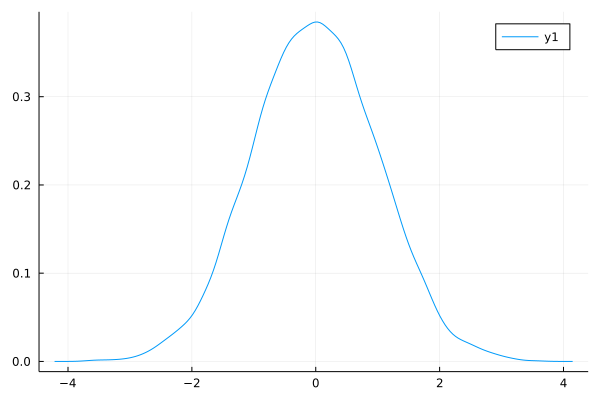

In [8]:
plotvalsA4 = Array{Float64}(undef, 10000)

for i in 1:10000
    randval = randNormal(4)
    plotvalsA4[i] = randval
end
println("Mean of distribution for a = 4: ", mean(plotvalsA4))
sdev = stdDev(plotvalsA4)
println("Standard Deviation of distribution for a=4: ", sdev)
density(plotvalsA4)

For finding key values of a=1

Mean of distribution for a = 1: -0.006112440370341545
Standard Deviation of distribution for a=1: 0.5390633958109247


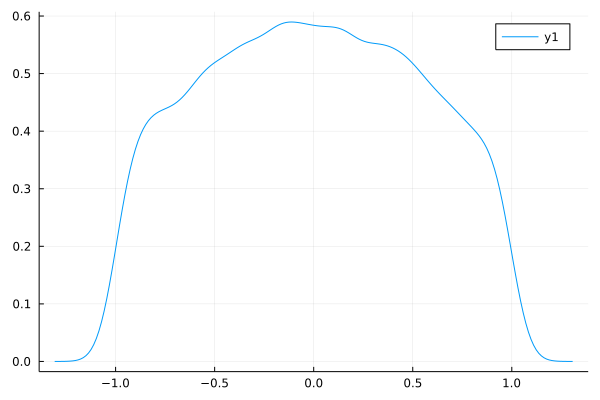

In [9]:
plotvalsA1 = Array{Float64}(undef, 10000)


for i in 1:10000
    randval = randNormal(1)
    plotvalsA1[i] = randval
end

println("Mean of distribution for a = 1: ", mean(plotvalsA1))
sdev = stdDev(plotvalsA1)
println("Standard Deviation of distribution for a=1: ", sdev)
density(plotvalsA4)

density(plotvalsA1)

Therefore, we can see:

* mean is more or less equal
* standard deviation varies to high extent
* the ends fall off quickly for a=1, as expected